In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df_train = pd.read_csv('JOB_A_THON_train.csv')
df_test = pd.read_csv('JOB_A_THON_test.csv')

In [3]:
df_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df_train.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [5]:
df_train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [6]:
df_train.shape

(50882, 14)

In [7]:
df_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [8]:
df_train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [9]:
df_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


### Univariate Analysis

Skewness is 0.21736404502350837


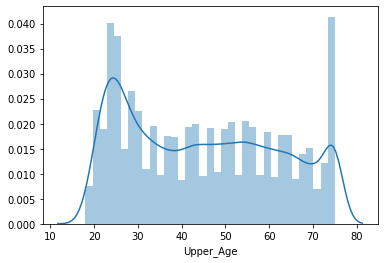

In [10]:
sns.distplot(df_train['Upper_Age'])
print(f"Skewness is {sp.skew(df_train['Upper_Age'])}")
plt.show()

Skewness is 0.3305842862332204


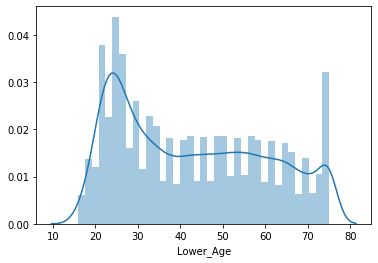

In [11]:
sns.distplot(df_train['Lower_Age'])
print(f"Skewness is {sp.skew(df_train['Lower_Age'])}")
plt.show()

Skewness is 0.7824398222876398


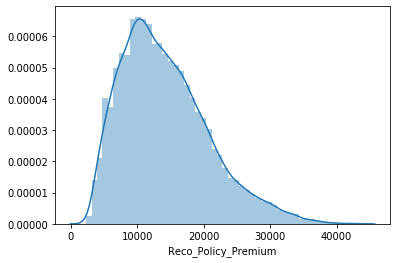

In [12]:
sns.distplot(df_train['Reco_Policy_Premium'])
print(f"Skewness is {sp.skew(df_train['Reco_Policy_Premium'])}")
plt.show()

In [13]:
df_train['Region_Code'].nunique()

5316

In [14]:
#fig, ax = plt.subplots(1,1, figsize = (10, 10))
#sns.countplot(df_train['Region_Code'])
#plt.show()

In [15]:
df_train.groupby(['Region_Code'])['Region_Code'].count()

Region_Code
1       96
2       73
4       73
5       75
6       73
        ..
6188     1
6189     1
6191     1
6193     1
6194     1
Name: Region_Code, Length: 5316, dtype: int64

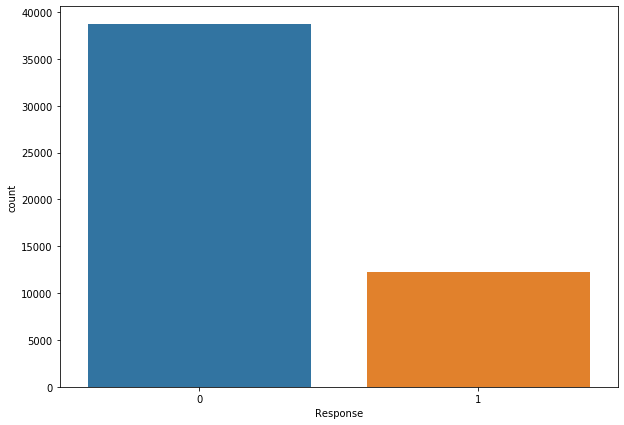

In [16]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Response'])
plt.show()

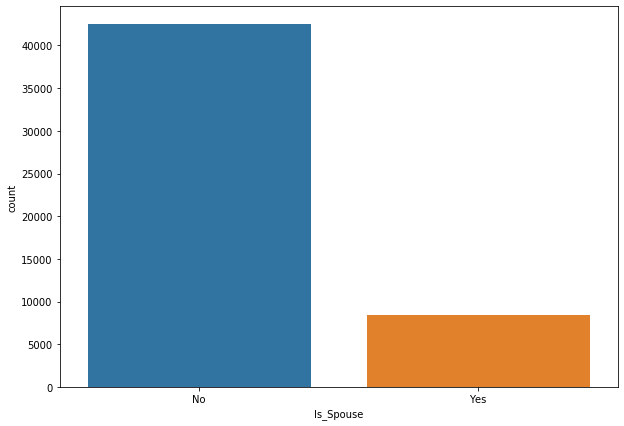

In [17]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Is_Spouse'])
plt.show()

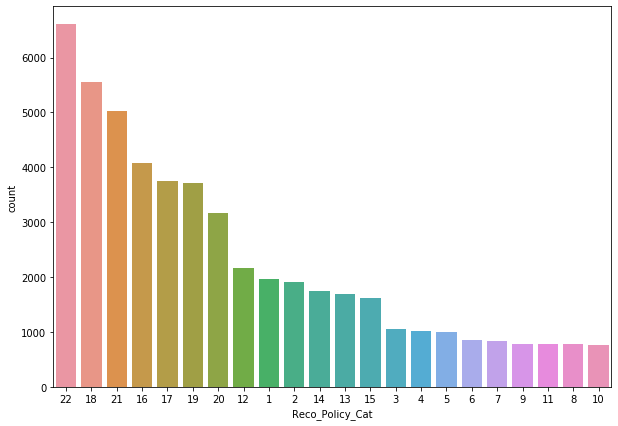

In [18]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Reco_Policy_Cat'], order=df_train['Reco_Policy_Cat'].value_counts().index)
plt.show()

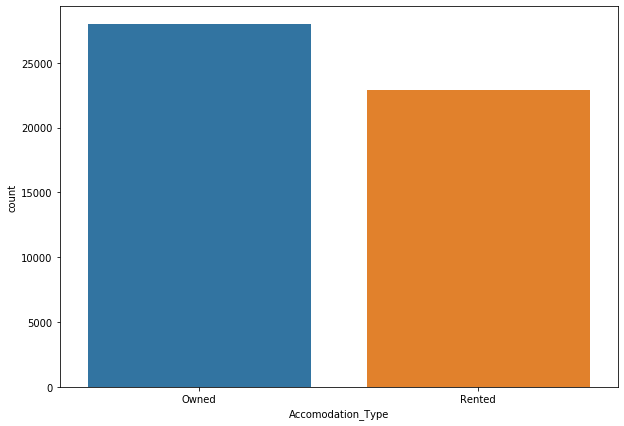

In [19]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Accomodation_Type'], order=df_train['Accomodation_Type'].value_counts().index)
plt.show()

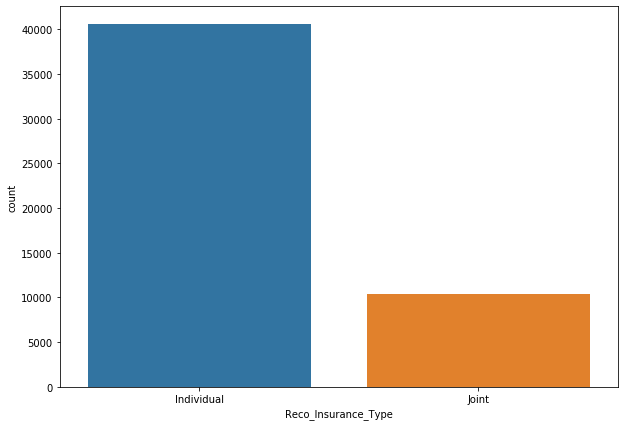

In [20]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Reco_Insurance_Type'], order=df_train['Reco_Insurance_Type'].value_counts().index)
plt.show()

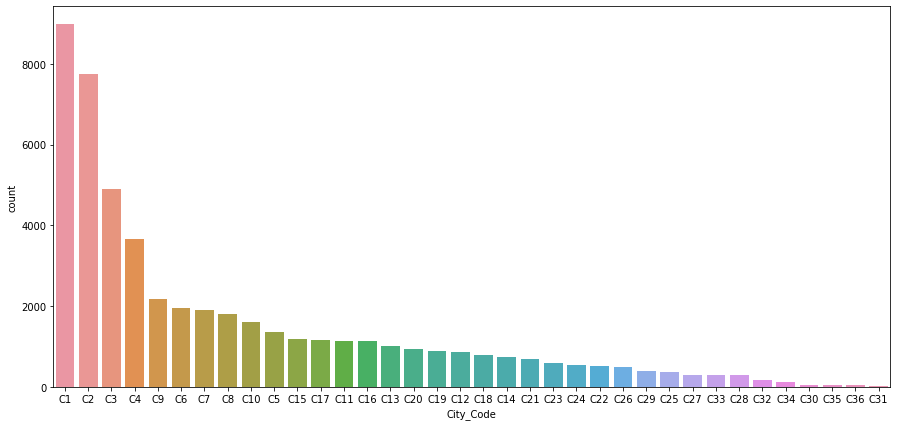

In [21]:
fig, ax = plt.subplots(1,1, figsize = (15, 7))
sns.countplot(df_train['City_Code'], order=df_train['City_Code'].value_counts().index)
plt.show()

### Bivariate Analysis

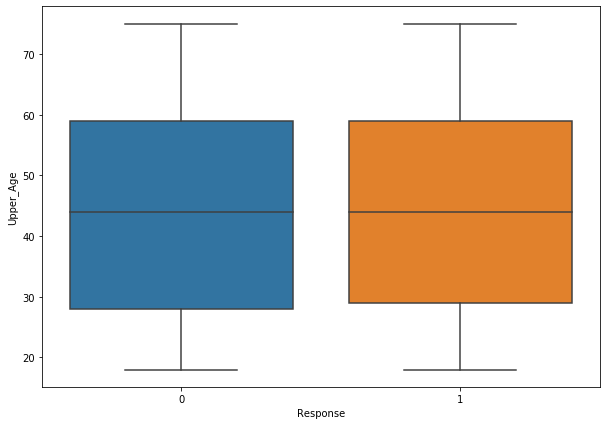

In [22]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.boxplot(df_train['Response'], df_train['Upper_Age'])
plt.show()

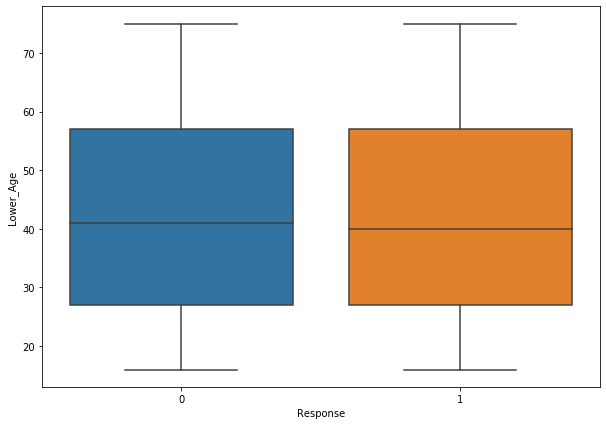

In [23]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.boxplot(df_train['Response'], df_train['Lower_Age'])
plt.show()

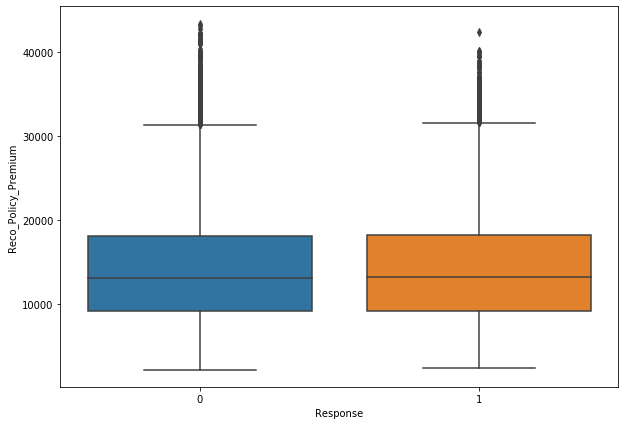

In [24]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.boxplot(df_train['Response'], df_train['Reco_Policy_Premium'])
plt.show()

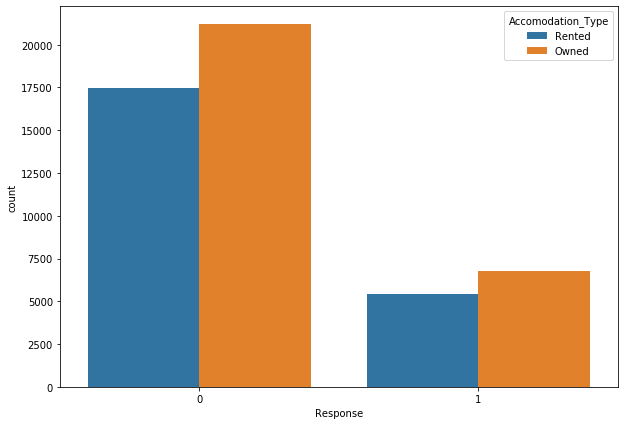

In [25]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Response'], hue=df_train['Accomodation_Type'])
plt.show()

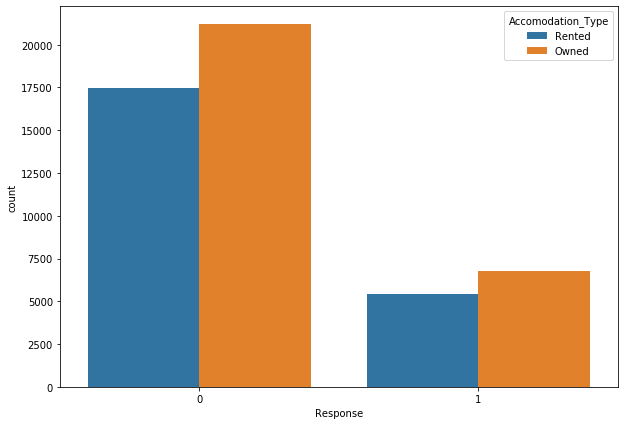

In [26]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Response'], hue=df_train['Accomodation_Type'])
plt.show()

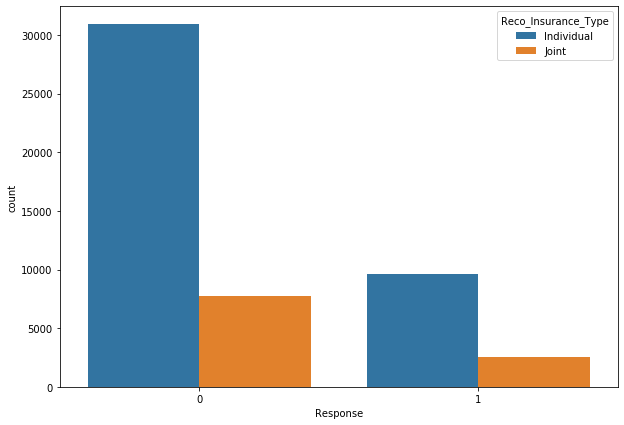

In [27]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Response'], hue=df_train['Reco_Insurance_Type'])
plt.show()

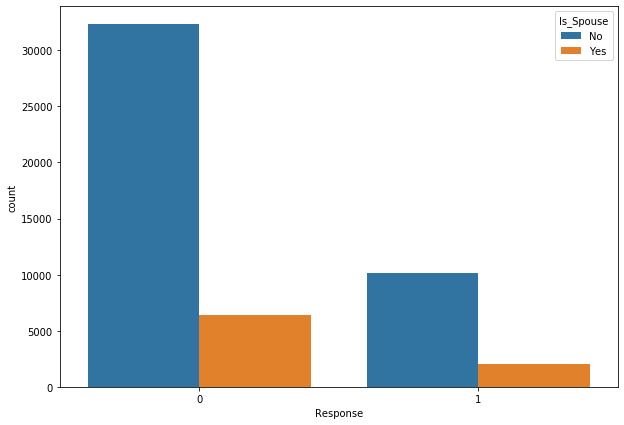

In [28]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
sns.countplot(df_train['Response'], hue=df_train['Is_Spouse'])
plt.show()

### Data Preprocessing

In [78]:
df = df_train.copy()

### Transformation

In [79]:
print(f"Skewness is {sp.skew(df['Upper_Age'])}")

Skewness is 0.21736404502350837


In [80]:
df['Upper_Age'] = np.sqrt(df['Upper_Age'])

In [81]:
print(f"Skewness after square root transformation is {sp.skew(df['Upper_Age'])}") 

Skewness after square root transformation is 0.006123075323185341


In [82]:
print(f"Skewness is {sp.skew(df['Lower_Age'])}")

Skewness is 0.3305842862332204


In [83]:
df['Lower_Age'] = np.cbrt(df['Lower_Age'])

In [84]:
sp.skew(df['Lower_Age'])

0.03699337145339699

In [85]:
print(f"Skewness is {sp.skew(df['Reco_Policy_Premium'])}")

Skewness is 0.7824398222876398


In [86]:
df['Reco_Policy_Premium'] = np.cbrt(df['Reco_Policy_Premium'])

In [87]:
sp.skew(df['Reco_Policy_Premium'])

0.03860661523154751

In [88]:
df['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [89]:
df['Holding_Policy_Duration'].replace(to_replace='14+',
    value=15,
    inplace=True,)

In [90]:
df['Holding_Policy_Duration'].replace(to_replace=np.nan,
    value=-99999,
    inplace=True,)

In [91]:
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'])

In [92]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(int)

In [93]:
df['Holding_Policy_Duration'].replace(to_replace=-99999,
    value=np.nan,
    inplace=True,)

In [94]:
df['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [95]:
df['Health Indicator'].replace(to_replace=np.nan,
    value='XN',
    inplace=True,)

In [96]:
df['Health Indicator'] = df['Health Indicator'].map(lambda x:x[-1])

In [97]:
df['Health Indicator'].unique()

array(['1', '2', 'N', '4', '3', '6', '5', '8', '7', '9'], dtype=object)

In [98]:
df['Health Indicator'].replace(to_replace='N',
    value=np.nan,
    inplace=True,)

In [99]:
df['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [100]:
df['Holding_Policy_Type'].replace(to_replace=np.nan,
    value='-99999',
    inplace=True,)

In [101]:
df['Holding_Policy_Type'] = df['Holding_Policy_Type'].astype(int)

In [102]:
df['Holding_Policy_Type'].replace(to_replace=-99999,
    value=np.nan,
    inplace=True,)

### MICE

In [103]:
df.drop(columns = ['ID'], inplace=True)

In [104]:
#df[df['Holding_Policy_Duration'] == -99999]

In [105]:
City_Code_dummy = pd.get_dummies(df['City_Code'], prefix='City_Code', drop_first=True)

In [130]:
City_Code_dummy.shape

(50882, 35)

In [106]:
Region_Code_dummy = pd.get_dummies(df['Region_Code'], prefix='Region_Code', drop_first=True)

In [131]:
Region_Code_dummy.shape

(50882, 5315)

In [107]:
Accomodation_Type_dummy = pd.get_dummies(df['Accomodation_Type'], prefix='Accomodation_Type', drop_first=True)

In [108]:
Reco_Insurance_Type_dummy = pd.get_dummies(df['Reco_Insurance_Type'], prefix='Reco_Insurance_Type', drop_first=True)

In [109]:
Is_Spouse_dummy = pd.get_dummies(df['Is_Spouse'], prefix='Is_Spouse', drop_first=True)

In [110]:
Reco_Policy_Cat_dummy = pd.get_dummies(df['Reco_Policy_Cat'], prefix='Reco_Policy_Cat', drop_first=True)

In [111]:
df.drop(columns = ['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',\
                   'Reco_Policy_Cat'], inplace = True)

In [112]:
#train_data = pd.concat([df, City_Code_dummy, Region_Code_dummy, Accomodation_Type_dummy, Reco_Insurance_Type_dummy, \
 #         Is_Spouse_dummy, Reco_Policy_Cat_dummy], axis = 1)

In [132]:
train_data = pd.concat([df,City_Code_dummy, Accomodation_Type_dummy, Reco_Insurance_Type_dummy, \
          Is_Spouse_dummy, Reco_Policy_Cat_dummy], axis = 1)

In [133]:
X = train_data.drop(columns = ['Response'], axis = 1)
y = train_data['Response']

In [134]:
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [136]:
X_train.columns

Index(['Upper_Age', 'Lower_Age', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Premium', 'City_Code_C10',
       'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14',
       'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18',
       'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21',
       'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25',
       'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29',
       'City_Code_C3', 'City_Code_C30', 'City_Code_C31', 'City_Code_C32',
       'City_Code_C33', 'City_Code_C34', 'City_Code_C35', 'City_Code_C36',
       'City_Code_C4', 'City_Code_C5', 'City_Code_C6', 'City_Code_C7',
       'City_Code_C8', 'City_Code_C9', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_Yes', 'Reco_Policy_Cat_2',
       'Reco_Policy_Cat_3', 'Reco_Policy_Cat_4', 'Reco_Policy_Cat_5',
       'Reco_Policy_Cat_6', 'Reco_Policy_Cat_

In [137]:
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]

In [138]:
imputer = IterativeImputer(estimator=BayesianRidge(), verbose=0, max_iter=100, tol=0.0000000001)

In [139]:
imputer.fit(X_train)

IterativeImputer(estimator=BayesianRidge(), max_iter=100, tol=1e-10)

In [140]:
X_train_imputed = imputer.transform(X_train)

In [141]:
X_train_imputed.shape

(35617, 65)

In [144]:
X_test_imputed = imputer.transform(X_test)

In [143]:
X_train_imputed = pd.DataFrame(columns = ['Upper_Age', 'Lower_Age', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Premium', 'City_Code_C10',
       'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14',
       'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18',
       'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21',
       'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25',
       'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29',
       'City_Code_C3', 'City_Code_C30', 'City_Code_C31', 'City_Code_C32',
       'City_Code_C33', 'City_Code_C34', 'City_Code_C35', 'City_Code_C36',
       'City_Code_C4', 'City_Code_C5', 'City_Code_C6', 'City_Code_C7',
       'City_Code_C8', 'City_Code_C9', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_Yes', 'Reco_Policy_Cat_2',
       'Reco_Policy_Cat_3', 'Reco_Policy_Cat_4', 'Reco_Policy_Cat_5',
       'Reco_Policy_Cat_6', 'Reco_Policy_Cat_7', 'Reco_Policy_Cat_8',
       'Reco_Policy_Cat_9', 'Reco_Policy_Cat_10', 'Reco_Policy_Cat_11',
       'Reco_Policy_Cat_12', 'Reco_Policy_Cat_13', 'Reco_Policy_Cat_14',
       'Reco_Policy_Cat_15', 'Reco_Policy_Cat_16', 'Reco_Policy_Cat_17',
       'Reco_Policy_Cat_18', 'Reco_Policy_Cat_19', 'Reco_Policy_Cat_20',
       'Reco_Policy_Cat_21', 'Reco_Policy_Cat_22'], data = X_train_imputed)

In [145]:
X_test_imputed = pd.DataFrame(columns = ['Upper_Age', 'Lower_Age', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Premium', 'City_Code_C10',
       'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14',
       'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18',
       'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21',
       'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25',
       'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29',
       'City_Code_C3', 'City_Code_C30', 'City_Code_C31', 'City_Code_C32',
       'City_Code_C33', 'City_Code_C34', 'City_Code_C35', 'City_Code_C36',
       'City_Code_C4', 'City_Code_C5', 'City_Code_C6', 'City_Code_C7',
       'City_Code_C8', 'City_Code_C9', 'Accomodation_Type_Rented',
       'Reco_Insurance_Type_Joint', 'Is_Spouse_Yes', 'Reco_Policy_Cat_2',
       'Reco_Policy_Cat_3', 'Reco_Policy_Cat_4', 'Reco_Policy_Cat_5',
       'Reco_Policy_Cat_6', 'Reco_Policy_Cat_7', 'Reco_Policy_Cat_8',
       'Reco_Policy_Cat_9', 'Reco_Policy_Cat_10', 'Reco_Policy_Cat_11',
       'Reco_Policy_Cat_12', 'Reco_Policy_Cat_13', 'Reco_Policy_Cat_14',
       'Reco_Policy_Cat_15', 'Reco_Policy_Cat_16', 'Reco_Policy_Cat_17',
       'Reco_Policy_Cat_18', 'Reco_Policy_Cat_19', 'Reco_Policy_Cat_20',
       'Reco_Policy_Cat_21', 'Reco_Policy_Cat_22'], data = X_test_imputed)

In [146]:
X_test_imputed.shape

(15265, 65)

### Models

In [176]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [157]:
logistic_regression = LogisticRegression(n_jobs = -1)

In [158]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [159]:
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
space['class_weight'] = ['balanced', 'None']

In [160]:
search = RandomizedSearchCV(logistic_regression, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

In [161]:
result = search.fit(X_train_imputed, y_train)

/Users/gauravkantrod/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/gauravkantrod/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [162]:
y_predict = search.predict(X_test_imputed)

In [163]:
accuracy_score(y_test, y_predict)

0.7599082869308876

In [164]:
confusion_matrix(y_test, y_predict)

array([[11584,    18],
       [ 3647,    16]])

In [166]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11602
           1       0.47      0.00      0.01      3663

    accuracy                           0.76     15265
   macro avg       0.62      0.50      0.44     15265
weighted avg       0.69      0.76      0.66     15265



In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn = KNeighborsClassifier(n_jobs = -1)

In [185]:
grid = dict()
grid['weights'] = ['distance', 'uniform']
grid['n_neighbors'] = range(1,20)
grid['p'] = [1,2,3,4,5]  
grid['algorithm']  = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [186]:
kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=1)
search_knn = RandomizedSearchCV(knn, grid, cv=kfold, return_train_score=True ,verbose=True, n_jobs = -1)

In [ ]:
search_fit = search_knn.fit(X_train_imputed, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  6.3min


In [ ]:
y_predicted_knn = search_fit.predict(X_test_imputed)

In [175]:
accuracy_score(y_test, y_predicted_knn)

0.7217163445791025

In [172]:
confusion_matrix(y_test, y_predict)

array([[11584,    18],
       [ 3647,    16]])

In [173]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11602
           1       0.47      0.00      0.01      3663

    accuracy                           0.76     15265
   macro avg       0.62      0.50      0.44     15265
weighted avg       0.69      0.76      0.66     15265

